In [ ]:
!pip install mlxtend==0.22.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.5 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.23.4
    Uninstalling mlxtend-0.23.4:
      Successfully uninstalled mlxtend-0.23.4


import required libraries


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
#read the data
df = pd.read_csv("/content/ushape.csv",header=None)
df.head()

,0,1,2
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


In [ ]:
df.shape

(100, 3)

In [ ]:
#add the columns x,y,class
df.columns = ['x','y','class']
df.head()

,x,y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


In [ ]:
df.describe()

,x,y,class
count,100.000000,100.000000,100.000000
mean,0.500420,0.228701,0.500000
std,0.891044,0.592885,0.502519
min,-1.318500,-1.035702,0.000000
25%,-0.140330,-0.203260,0.000000
50%,0.470678,0.188660,0.500000
75%,1.112008,0.658448,1.000000
max,2.181372,1.571899,1.000000


In [ ]:
#check the null values
df.isnull().sum()

,0
x,0
y,0
class,0


In [ ]:
#check duplicate data
df.duplicated().sum()

np.int64(0)

In [ ]:
# drop the duplicates
df.drop_duplicates()

,x,y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0
...,...,...,...
95,1.699453,0.587720,1.0
96,0.218623,-0.652521,1.0
97,0.952914,-0.419766,1.0
98,-1.318500,0.423112,0.0


In [ ]:
df.dtypes

,0
x,float64
y,float64
class,float64


In [ ]:
df.head(5)

,x,y,class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


**Split Features and Target**

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['x', 'y']].values
y = df['class'].astype(int).values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)


Training Shape: (70, 2)
Testing Shape: (30, 2)


**Scale / Normalize Data**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Train KNN Model & Choose Best K**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

best_k = 1
best_score = 0

for k in [1,2,3,4,5,6,7,8,9,10]:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = np.mean(cross_val_score(knn, X_train, y_train, cv=5))
    print(f"K={k} → Accuracy: {score:.3f}")

    if score > best_score:
        best_score = score
        best_k = k

print(f"\nBest K value = {best_k}")


K=1 → Accuracy: 0.914
K=2 → Accuracy: 0.943
K=3 → Accuracy: 0.929
K=4 → Accuracy: 0.871
K=5 → Accuracy: 0.929
K=6 → Accuracy: 0.914
K=7 → Accuracy: 0.943
K=8 → Accuracy: 0.929
K=9 → Accuracy: 0.914
K=10 → Accuracy: 0.886

Best K value = 2


**Final Model, Predictions & Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("\nPredictions:", y_pred)
print("Model Accuracy:", accuracy_score(y_test, y_pred))



Predictions: [0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0]
Model Accuracy: 0.9333333333333333


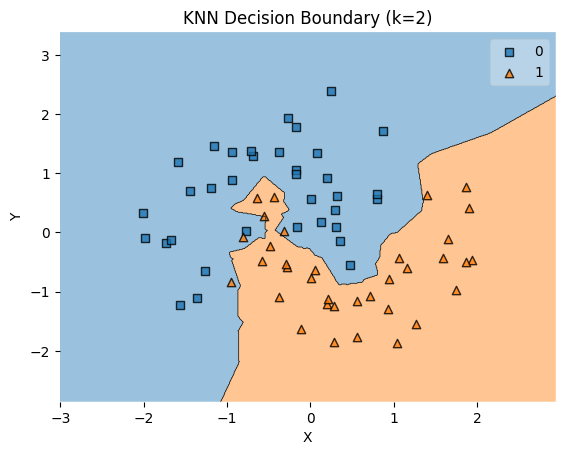

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

plot_decision_regions(X_train, y_train, clf=knn)
plt.title(f"KNN Decision Boundary (k={best_k})")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
